<a href="https://colab.research.google.com/github/JeromeMberia/user_review_analysis/blob/main/user_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## Installing Libraries

In [ ]:
# Installing required packages. 
!pip install wordnet
!pip install wordninja  # used to  split concatenated words into separate words
!pip3 install textblob
!pip install nltk
!pip install textstat
!pip install contractions
!pip install fasttext

  Created wheel for wordnet: filename=wordnet-0.0.1b2-cp36-none-any.whl size=10522 sha256=92b4db56a34d3d70035a0d07cec80e58eb056de276cb64fdb2ea51f49d4a1b37
  Stored in directory: /root/.cache/pip/wheels/9f/b7/a9/9f8f3c925c912ac2e8dfa5f8373cd48f18b1074da35b155ad9
Successfully built wordnet
     |████████████████████████████████| 542kB 16.5MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-cp36-none-any.whl size=541553 sha256=96d5e2db992da4e5daf268ba89f4b1f1b374a87449bb22dab36905d3743e4b7b
  Stored in directory: /root/.cache/pip/wheels/22/46/06/9b6d10ed02c85e93c3bb33ac50e2d368b2586248f192a2e22a
Successfully built wordninja
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 1.9MB 29.2MB/s 
     |████████████████████████████████| 266kB 24.4MB/s 
     |████████████████████████████████| 327kB 52.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp36-cp36m-linux_x86_64.whl size=84346 sha256=b62a716d4ed1e8201c3df271e1aa

## Importing Libraries

In [ ]:
# Importing our Essential Libraries
import pandas as pd      # library for data manipulation and analysis
import numpy as np       # library for performin scientific computations
import matplotlib.pyplot as plt  # library for performin scientific computations
import seaborn as sns            # library for creating rich data visualisations


from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator ##is a data visualization technique used
#for representing text data in which the size of each word indicates its frequency
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import fasttext
import contractions

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk import word_tokenize, ngrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import wordninja 
from textblob import TextBlob
from wordcloud import WordCloud
import warnings
import spacy #for training the NER model tokenize words
import random
from collections import Counter
import plotly.express as px
import plotly.figure_factory as ff
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Dataset

## Reading the dataset

In [ ]:
#uploading and readin the dataset
data = pd.read_csv("/content/user_review_data.csv")
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


## Checking the Data

In [ ]:
#checking the top 5 rows
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


In [ ]:
#checking the bottom 5 rows
data.tail()

,review_body,star_rating
14995,"I have a TAG Heuer carrera twin time watch, wh...",5
14996,It is hard sometimes to judge a product by its...,5
14997,reloj en perfecto estado llego todo a tiempo l...,5
14998,This is my third ironman. There are more expe...,5
14999,i use it everyday,5


Observation: the data dataset is uniform from top to the borrom. 

In [ ]:
#Getting the dataset shape.
data.shape

(15000, 2)

Observation: dataset has 15000 records and two variables/field/colunms. 

In [ ]:
##Get the summary of this dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  15000 non-null  object
 1   star_rating  15000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 234.5+ KB


observation: our dataset comprise of object and integer datatype. both colunms has 15000 values, this is a clue of no missing values. 

In [ ]:
#checking the body_review variable values
data['review_body'].sample(n=10, random_state=610)

3293     The delivery was prompt. I got the correct pro...
5328                                    not silent running
13737                                         good quality
3751     not happy<br /><br />  the band is very stiff ...
14280                                            Excellent
7552                 A backlight would be a useful feature
13104    So far so good with this product. My fiancée i...
11599    This is a nice watch, however it is a little h...
6004     IT IS OK. SEEMS TO BE A GOOD QUALITY. I RECOME...
2401     Similar to this watch. Undelivered to this dat...
Name: review_body, dtype: object

observation: the values comprises of words, symbols, panctuations and so on.

In [ ]:
#Using groupby will check the data
data.groupby('star_rating').describe()

review_body  ...     
                  count  ... freq
star_rating              ...     
1                  3000  ...    3
2                  3000  ...    4
3                  3000  ...    7
4                  3000  ...   11
5                  3000  ...    8

[5 rows x 4 columns]

observation: this is the preview of dataset based on the rating. all the star rating have similar value count. 

In [ ]:
#previewing the dataset variables
data.columns

Index(['review_body', 'star_rating'], dtype='object')

observation: the two colunms are, review_body, and star_rating

# Data cleaning

Here we will check for remove any unnecessary variables/features/columns if any, duplicates and  other preprocessing procedures are tokenizing(spliting), and lemmatization.




## Duplicate

In [ ]:
#Checking for duplicates
data.duplicated().sum()

439

observation: there are 439 duplicates.

In [ ]:
#dropping the duplicates
data.drop_duplicates(inplace=True)
#
#confirming no duplicates
data.duplicated().any()

False

observation: duplicates have been dropped.

## Null Value

In [ ]:
#checking for the missing values
data.isnull().sum()

review_body    0
star_rating    0
dtype: int64

observation: there is no missing values

## Pre Processing the Data

In [ ]:
bag_of_words = data.copy()

### HTML tags 

In [ ]:
import re 
def clean_text_round1(text):
  '''Remove HTML tags'''
  text = re.sub('<.*?>','', text)
  return text

fix = lambda x: clean_text_round1(x)
bag_of_words['review_body'] = pd.DataFrame(bag_of_words.review_body.apply(fix))

### Expanding Contractions

In [ ]:
bag_of_words['review_body_cr'] = bag_of_words['review_body'].apply(lambda x: [contractions.fix(word) for word in x.split()])
data.head()

,review_body,star_rating
0,Good luck finding a reasonably priced band rep...,1
1,No i get dark on the first week with me!! I wi...,1
2,I dont know if mine was a mistake but it clear...,1
3,The rod that holds the bracelet broke several ...,1
4,"I bought 2 watches , one watch doesnot work at...",1


In [ ]:
bag_of_words['review_body_str'] = [' '.join(map(str, l)) for l in bag_of_words['review_body_cr']]
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at..."


### Dealing with foreign words

In [ ]:
!git clone https://github.com/facebookresearch/fastText.git
!pip install fastText

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.23 MiB | 32.90 MiB/s, done.
Resolving deltas: 100% (2416/2416), done.


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2021-02-16 21:02:40--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M  24.1MB/s    in 5.9s    

2021-02-16 21:02:47 (21.4 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



In [ ]:
pretrained_model = "lid.176.bin" 
model = fasttext.load_model(pretrained_model)
langs = []
for sent in bag_of_words['review_body']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
bag_of_words['langs'] = langs

In [ ]:
bag_of_words = bag_of_words[bag_of_words['langs']=='en']
bag_of_words.tail()

,review_body,star_rating,review_body_cr,review_body_str,langs
14994,I absolutely adore this watch. I get so many ...,5,"[I, absolutely, adore, this, watch., I, get, s...",I absolutely adore this watch. I get so many c...,en
14995,"I have a TAG Heuer carrera twin time watch, wh...",5,"[I, have, a, TAG, Heuer, carrera, twin, time, ...","I have a TAG Heuer carrera twin time watch, wh...",en
14996,It is hard sometimes to judge a product by its...,5,"[It, is, hard, sometimes, to, judge, a, produc...",It is hard sometimes to judge a product by its...,en
14998,This is my third ironman. There are more expe...,5,"[This, is, my, third, ironman., There, are, mo...",This is my third ironman. There are more expen...,en
14999,i use it everyday,5,"[i, use, it, everyday]",i use it everyday,en


### Tokenize

In [ ]:
bag_of_words['tokenized'] = bag_of_words['review_body_str'].apply(word_tokenize)
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,..."
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot..."


### Lowercase

In [ ]:
bag_of_words['lower'] = bag_of_words['tokenized'].apply(lambda x: [word.lower() for word in x])
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized,lower
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,..."
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, ,, one, watch, doesnot..."


### Remove Punctuation

In [ ]:
punc = string.punctuation
bag_of_words['no_punc'] = bag_of_words['lower'].apply(lambda x: [word for word in x if word not in punc])
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized,lower,no_punc
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,..."
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, one, watch, doesnot, w..."


### Remove stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
bag_of_words['stopwords_removed'] = bag_of_words['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized,lower,no_punc,stopwords_removed
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, reasonably, priced, band..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[get, dark, first, week, never, buy, item, buy..."
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[know, mine, mistake, clearly, states, aqua, c..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[rod, holds, bracelet, broke, several, times, ..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, one, watch, doesnot, w...","[bought, 2, watches, one, watch, doesnot, work..."


In [ ]:
bag_of_words['pos_tags'] = bag_of_words['stopwords_removed'].apply(nltk.tag.pos_tag)
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, reasonably, priced, band...","[(good, JJ), (luck, NN), (finding, VBG), (reas..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[get, dark, first, week, never, buy, item, buy...","[(get, VB), (dark, JJ), (first, JJ), (week, NN..."
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[know, mine, mistake, clearly, states, aqua, c...","[(know, VB), (mine, JJ), (mistake, VB), (clear..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[rod, holds, bracelet, broke, several, times, ...","[(rod, NN), (holds, VBZ), (bracelet, RB), (bro..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, one, watch, doesnot, w...","[bought, 2, watches, one, watch, doesnot, work...","[(bought, VBD), (2, CD), (watches, NNS), (one,..."


### Part of speech

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
bag_of_words['wordnet_pos'] = bag_of_words['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, reasonably, priced, band...","[(good, JJ), (luck, NN), (finding, VBG), (reas...","[(good, a), (luck, n), (finding, v), (reasonab..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[get, dark, first, week, never, buy, item, buy...","[(get, VB), (dark, JJ), (first, JJ), (week, NN...","[(get, v), (dark, a), (first, a), (week, n), (..."
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[know, mine, mistake, clearly, states, aqua, c...","[(know, VB), (mine, JJ), (mistake, VB), (clear...","[(know, v), (mine, a), (mistake, v), (clearly,..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[rod, holds, bracelet, broke, several, times, ...","[(rod, NN), (holds, VBZ), (bracelet, RB), (bro...","[(rod, n), (holds, v), (bracelet, r), (broke, ..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, one, watch, doesnot, w...","[bought, 2, watches, one, watch, doesnot, work...","[(bought, VBD), (2, CD), (watches, NNS), (one,...","[(bought, v), (2, n), (watches, n), (one, n), ..."


### lemmatize

In [ ]:
wnl = WordNetLemmatizer()
bag_of_words['lemmatized'] = bag_of_words['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, reasonably, priced, band...","[(good, JJ), (luck, NN), (finding, VBG), (reas...","[(good, a), (luck, n), (finding, v), (reasonab...","[good, luck, find, reasonably, price, band, re..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[get, dark, first, week, never, buy, item, buy...","[(get, VB), (dark, JJ), (first, JJ), (week, NN...","[(get, v), (dark, a), (first, a), (week, n), (...","[get, dark, first, week, never, buy, item, buy..."
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[know, mine, mistake, clearly, states, aqua, c...","[(know, VB), (mine, JJ), (mistake, VB), (clear...","[(know, v), (mine, a), (mistake, v), (clearly,...","[know, mine, mistake, clearly, state, aqua, co..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[rod, holds, bracelet, broke, several, times, ...","[(rod, NN), (holds, VBZ), (bracelet, RB), (bro...","[(rod, n), (holds, v), (bracelet, r), (broke, ...","[rod, hold, bracelet, break, several, time, co..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, one, watch, doesnot, w...","[bought, 2, watches, one, watch, doesnot, work...","[(bought, VBD), (2, CD), (watches, NNS), (one,...","[(bought, v), (2, n), (watches, n), (one, n), ...","[buy, 2, watch, one, watch, doesnot, work, wat..."


### Change number words to numbers

In [ ]:
!pip install word2number

  Created wheel for word2number: filename=word2number-1.1-cp36-none-any.whl size=5588 sha256=7685f37e4def048a8de26dfaff9fc6400406dda11651381378097b54ece14884
  Stored in directory: /root/.cache/pip/wheels/46/2f/53/5f5c1d275492f2fce1cdab9a9bb12d49286dead829a4078e0e
Successfully built word2number


In [ ]:
from word2number import w2n 
  
def num_word(text_2):
  try:
    res = w2n.word_to_num(text_2)
    return str(res)
  except:
    return text_2

In [ ]:
bag_of_words['lemmatized_2'] = bag_of_words['lemmatized'].apply(lambda x: [num_word(word) for word in x])

### Removing Numbers

In [ ]:
def clean_text_round2(text):
  '''Remove punctuation, remove punctuation and remove words containing numbers.'''
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\d', '', text)
  return text

In [ ]:
bag_of_words['clean'] = bag_of_words['lemmatized_2'].apply(lambda x: [clean_text_round2(word) for word in x])

In [ ]:
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemmatized_2,clean
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, reasonably, priced, band...","[(good, JJ), (luck, NN), (finding, VBG), (reas...","[(good, a), (luck, n), (finding, v), (reasonab...","[good, luck, find, reasonably, price, band, re...","[good, luck, find, reasonably, price, band, re...","[good, luck, find, reasonably, price, band, re..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[get, dark, first, week, never, buy, item, buy...","[(get, VB), (dark, JJ), (first, JJ), (week, NN...","[(get, v), (dark, a), (first, a), (week, n), (...","[get, dark, first, week, never, buy, item, buy...","[get, dark, first, week, never, buy, item, buy...","[get, dark, first, week, never, buy, item, buy, ]"
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[know, mine, mistake, clearly, states, aqua, c...","[(know, VB), (mine, JJ), (mistake, VB), (clear...","[(know, v), (mine, a), (mistake, v), (clearly,...","[know, mine, mistake, clearly, state, aqua, co...","[know, mine, mistake, clearly, state, aqua, co...","[know, mine, mistake, clearly, state, aqua, co..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[rod, holds, bracelet, broke, several, times, ...","[(rod, NN), (holds, VBZ), (bracelet, RB), (bro...","[(rod, n), (holds, v), (bracelet, r), (broke, ...","[rod, hold, bracelet, break, several, time, co...","[rod, hold, bracelet, break, several, time, co...","[rod, hold, bracelet, break, several, time, co..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, one, watch, doesnot, w...","[bought, 2, watches, one, watch, doesnot, work...","[(bought, VBD), (2, CD), (watches, NNS), (one,...","[(bought, v), (2, n), (watches, n), (one, n), ...","[buy, 2, watch, one, watch, doesnot, work, wat...","[buy, 2, watch, 1, watch, doesnot, work, watch...","[buy, , watch, , watch, doesnot, work, watch, ..."


In [ ]:
pol = ["pil","",'pol']
pol

['pil', '', 'pol']

In [ ]:
list(filter(None, pol))

['pil', 'pol']

In [ ]:
# str_list = list(filter(None, str_list))
bag_of_words['clean2'] = bag_of_words['clean'].apply(lambda x: list(filter(None, x)))
bag_of_words.head()

,review_body,star_rating,review_body_cr,review_body_str,langs,tokenized,lower,no_punc,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemmatized_2,clean,clean2
0,Good luck finding a reasonably priced band rep...,1,"[Good, luck, finding, a, reasonably, priced, b...",Good luck finding a reasonably priced band rep...,en,"[Good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, a, reasonably, priced, b...","[good, luck, finding, reasonably, priced, band...","[(good, JJ), (luck, NN), (finding, VBG), (reas...","[(good, a), (luck, n), (finding, v), (reasonab...","[good, luck, find, reasonably, price, band, re...","[good, luck, find, reasonably, price, band, re...","[good, luck, find, reasonably, price, band, re...","[good, luck, find, reasonably, price, band, re..."
1,No i get dark on the first week with me!! I wi...,1,"[No, i, get, dark, on, the, first, week, with,...",No i get dark on the first week with me!! I wi...,en,"[No, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[no, i, get, dark, on, the, first, week, with,...","[get, dark, first, week, never, buy, item, buy...","[(get, VB), (dark, JJ), (first, JJ), (week, NN...","[(get, v), (dark, a), (first, a), (week, n), (...","[get, dark, first, week, never, buy, item, buy...","[get, dark, first, week, never, buy, item, buy...","[get, dark, first, week, never, buy, item, buy, ]","[get, dark, first, week, never, buy, item, buy]"
2,I dont know if mine was a mistake but it clear...,1,"[I, do not, know, if, mine, was, a, mistake, b...",I do not know if mine was a mistake but it cle...,en,"[I, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[i, do, not, know, if, mine, was, a, mistake, ...","[know, mine, mistake, clearly, states, aqua, c...","[(know, VB), (mine, JJ), (mistake, VB), (clear...","[(know, v), (mine, a), (mistake, v), (clearly,...","[know, mine, mistake, clearly, state, aqua, co...","[know, mine, mistake, clearly, state, aqua, co...","[know, mine, mistake, clearly, state, aqua, co...","[know, mine, mistake, clearly, state, aqua, co..."
3,The rod that holds the bracelet broke several ...,1,"[The, rod, that, holds, the, bracelet, broke, ...",The rod that holds the bracelet broke several ...,en,"[The, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[the, rod, that, holds, the, bracelet, broke, ...","[rod, holds, bracelet, broke, several, times, ...","[(rod, NN), (holds, VBZ), (bracelet, RB), (bro...","[(rod, n), (holds, v), (bracelet, r), (broke, ...","[rod, hold, bracelet, break, several, time, co...","[rod, hold, bracelet, break, several, time, co...","[rod, hold, bracelet, break, several, time, co...","[rod, hold, bracelet, break, several, time, co..."
4,"I bought 2 watches , one watch doesnot work at...",1,"[I, bought, 2, watches, ,, one, watch, doesnot...","I bought 2 watches , one watch doesnot work at...",en,"[I, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, ,, one, watch, doesnot...","[i, bought, 2, watches, one, watch, doesnot, w...","[bought, 2, watches, one, watch, doesnot, work...","[(bought, VBD), (2, CD), (watches, NNS), (one,...","[(bought, v), (2, n), (watches, n), (one, n), ...","[buy, 2, watch, one, watch, doesnot, work, wat...","[buy, 2, watch, 1, watch, doesnot, work, watch...","[buy, , watch, , watch, doesnot, work, watch, ...","[buy, watch, watch, doesnot, work, watch, run,..."


In [ ]:
bag_of_words.shape

(14363, 15)

In [ ]:
bag_of_words['review_body_clean'] = bag_of_words['clean2'].apply(lambda x: ' '.join(x))

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
bag_of_words['review_body'] = bag_of_words['review_body_clean']

In [ ]:
bag_of_words = bag_of_words[['review_body','star_rating']]

In [ ]:
bag_of_words.head()

,review_body,star_rating
0,good luck find reasonably price band replaceme...,1
1,get dark first week never buy item buy,1
2,know mine mistake clearly state aqua confuse m...,1
3,rod hold bracelet break several time company f...,1
4,buy watch watch doesnot work watch run time sl...,1


## Select

In [ ]:
#import spacy
import spacy
from spacy.matcher import Matcher 

from spacy import displacy 
from IPython.display import Image, display

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

In [ ]:
# extracting information
#function for rule 
def rule(text):
    
    doc = nlp(text)

    pat = []
    
    # iterate over tokens
    for token in doc:
        phrase = ''
        # if the word is a subject noun or an object noun
        if (token.pos_ == 'NOUN')\
            and (token.dep_ in ['dobj','pobj','nsubj','nsubjpass']):
            
            # iterate over the children nodes
            for subtoken in token.children:
                # if word is an adjective or has a compound dependency
                if (subtoken.pos_ == 'ADJ') or (subtoken.dep_ == 'compound'):
                    phrase += subtoken.text + ' '
                    
            if len(phrase)!=0:
                phrase += token.text
             
        if  len(phrase)!=0:
            pat.append(phrase)
        
    
    return pat

In [ ]:
# data_corpus1 contains all the sentences from all the customer review
row_list = []


for index, row in bag_of_words.iterrows():
  review_body = bag_of_words.loc[index,'review_body']
  star_rating = bag_of_words.loc[index,'star_rating']
  output = rule(review_body)
  dict1 = {'star_rating':star_rating,'review_body':review_body,'selected_text':output}
  row_list.append(dict1)
    
df_rule_all = pd.DataFrame(row_list)

In [ ]:
# selecting non-empty outputs
bag_of_words = pd.DataFrame(columns=df_rule_all.columns)

for row in range(len(df_rule_all)):
    
  if len(df_rule_all.loc[row,'selected_text'])!=0:
    bag_of_words = bag_of_words.append(df_rule_all.loc[row,:])

# reset the index
bag_of_words.reset_index(inplace=True)
bag_of_words.drop('index',axis=1,inplace=True) 
bag_of_words.shape 

(11559, 3)

## Sentiment Analyse

In [ ]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        return "Negative"
    else:
        return "Positive"
bag_of_words['sentiment']  = bag_of_words['review_body'].apply(lambda x: sentiment_analyse(x)) 
bag_of_words.head()

,star_rating,review_body,selected_text,sentiment
0,1,good luck find reasonably price band replaceme...,"[good luck, band order band dealer, wrong gues...",Positive
1,1,know mine mistake clearly state aqua confuse m...,"[mine mistake, much money]",Negative
2,1,rod hold bracelet break several time company f...,"[time company, sit drawer, fix time]",Positive
3,1,buy watch watch doesnot work watch run time sl...,"[doesnot work watch, beautiful doesnot show ti...",Positive
4,1,watch would fantastic hard set actually work p...,"[light turn, buy watch, little extra money, go...",Positive


In [ ]:
bag_of_words.to_csv('bag_of_words.csv')

# Performing EDA(Exploratory Data Analysis)

Exploratory Data Analysis is an approach of perfoming initial investigations on data in order to discover hidden patterns,test hypothesis and identify outliers. It enables us to see what the data can tell us beyond formal modeling

### Count / Density / Readability Features
 Language support

In [ ]:
import textstat

In [ ]:
analysis = data.copy()

 List of Functions

Syllable Count

Returns the number of syllables present

In [ ]:
plt.figure(figsize=(6,6))
# 
analysis['syllable_count'] = analysis['review_body'].apply(lambda x: textstat.syllable_count(x))


<Figure size 432x432 with 0 Axes>

Lexicon Count

Calculates the number of words present

In [ ]:
#
analysis['lexicon_count'] = analysis['review_body'].apply(lambda x: textstat.lexicon_count(x))

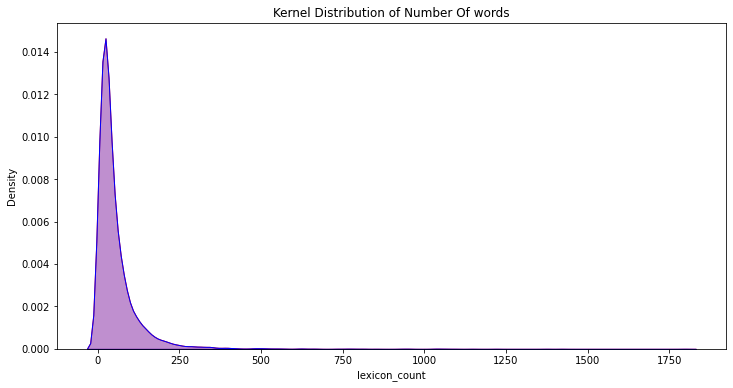

In [ ]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(analysis['lexicon_count'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(analysis['lexicon_count'], shade=True, color="b")

Sentence Count

Returns the number of sentences present

In [ ]:
#
analysis['sentence_count'] = analysis['review_body'].apply(lambda x: textstat.sentence_count(x))

The Flesch Reading Ease formula

In [ ]:
#Returns the Flesch Reading Ease Score
analysis['flesch_reading'] = analysis['review_body'].apply(lambda x: textstat.flesch_reading_ease(x))

Automated Readability Index

Returns the ARI **(*Automated Readability Index*)** which outputs a number that approximates the grade level needed to comprehend the text.

In [ ]:
#
analysis['automated_readability'] = analysis['review_body'].apply(lambda x: textstat.automated_readability_index(x))

Linsear Write Formula

Returns the grade level using the Linsear Write Formula.

In [ ]:
#
analysis['linsear_write_formula'] = analysis['review_body'].apply(lambda x: textstat.linsear_write_formula(x))

Dale-Chall Readability Score

lookup table of the most commonly used 3000 English words

In [ ]:
#
analysis['dale_chall_readability_score'] = analysis['review_body'].apply(lambda x: textstat.dale_chall_readability_score(x))

Readability Consensus based upon all the above tests

In [ ]:
#returns the estimated
analysis['text_standard'] = analysis['review_body'].apply(lambda x: textstat.textstat.text_standard(x))

In [ ]:
analysis['char_count'] = analysis['review_body'].apply(len)
analysis['word_count'] = analysis['review_body'].apply(lambda x: len(x.split()))
analysis['word_density'] = analysis['char_count'] / (analysis['word_count']+1)
analysis['punctuation_count'] = analysis['review_body'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
analysis['title_word_count'] = analysis['review_body'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
analysis['upper_case_word_count'] = analysis['review_body'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
analysis.head()

,review_body,star_rating,syllable_count,lexicon_count,sentence_count,flesch_reading,automated_readability,linsear_write_formula,dale_chall_readability_score,text_standard,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
0,Good luck finding a reasonably priced band rep...,1,78,61,3,76.25,9.0,7.875000,6.71,6th and 7th grade,324,61,5.225806,8,5,3
1,No i get dark on the first week with me!! I wi...,1,24,23,2,110.56,-1.5,4.750000,0.57,0th and 1st grade,92,23,3.833333,2,2,1
2,I dont know if mine was a mistake but it clear...,1,99,77,5,81.22,5.9,4.928571,6.25,5th and 6th grade,398,77,5.102564,9,7,2
3,The rod that holds the bracelet broke several ...,1,57,47,3,89.38,4.3,8.166667,1.11,4th and 5th grade,224,47,4.666667,8,5,1
4,"I bought 2 watches , one watch doesnot work at...",1,73,54,4,74.69,6.4,6.500000,6.06,6th and 7th grade,298,56,5.228070,10,5,3


In [ ]:
analysis.to_csv('analysis.csv')

In [ ]:
bag_of_words.head()

,star_rating,review_body,selected_text,sentiment
0,1,good luck find reasonably price band replaceme...,"[good luck, band order band dealer, wrong gues...",Positive
1,1,know mine mistake clearly state aqua confuse m...,"[mine mistake, much money]",Negative
2,1,rod hold bracelet break several time company f...,"[time company, sit drawer, fix time]",Positive
3,1,buy watch watch doesnot work watch run time sl...,"[doesnot work watch, beautiful doesnot show ti...",Positive
4,1,watch would fantastic hard set actually work p...,"[light turn, buy watch, little extra money, go...",Positive


In [ ]:
#looking  at the distribution of feedback in this data_corpus data
feedback_dist = bag_of_words.groupby('sentiment').count()['selected_text'].reset_index().sort_values(by='selected_text', ascending=False)
feedback_dist.style.background_gradient(cmap='Purples')

,sentiment,selected_text
1,Positive,9583
0,Negative,1976


observation: there is more positive customer reviews compared to

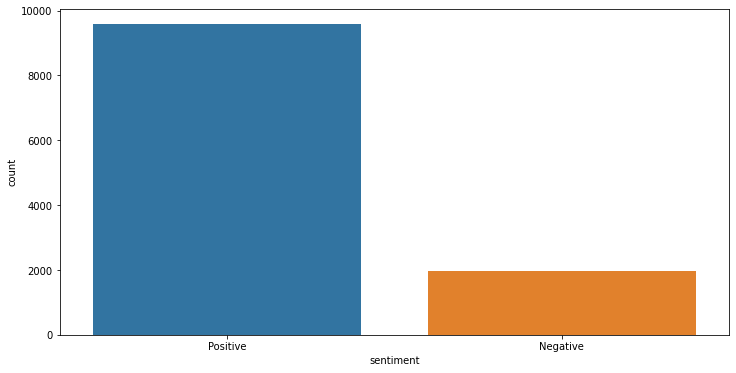

In [ ]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='sentiment',data=bag_of_words)

observation: there is more positive customer reviews compared to negative.

In [ ]:
feedback_dist

,sentiment,selected_text
1,Positive,9583
0,Negative,1976


In [ ]:
#visualizing sentiments with funnel charts
#
#checking sentiment distribution
import plotly.express as px
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text =feedback_dist.sentiment,
    values = feedback_dist.selected_text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

observation: postive feedbacks translates to 81.5% of the total feedback 

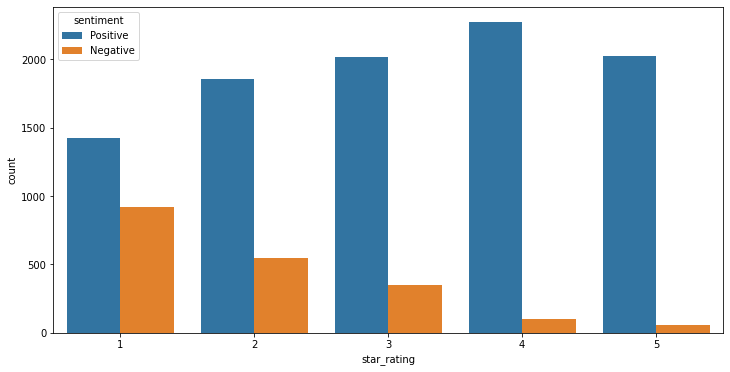

In [ ]:
plt.figure(figsize=(12,6))     #width and height
sns.countplot(x='star_rating', data = bag_of_words, hue='sentiment')

observation; 

Star rating of 1 had the highest negative review followed bt star rating of 2.

star rating of 4 and 5 had the lowest negative words in their review. this is expected as the customer can have a few pointer even if he is satisfied with the product.


In [ ]:
Positive_sent = bag_of_words[bag_of_words['sentiment']=='Positive']
Negative_sent = bag_of_words[bag_of_words['sentiment']=='Negative']

In [ ]:
#MosT common positive words
from collections import Counter
top = Counter([item for sublist in Positive_sent['selected_text'] for item in sublist])
review_positive = pd.DataFrame(top.most_common(20))
review_positive.columns = ['Common_positive_words','count']
review_positive.style.background_gradient(cmap='Greens')

,Common_positive_words,count
0,second hand,110
1,watch band,98
2,small wrist,93
3,nice watch,91
4,great watch,88
5,nice look,83
6,good watch,75
7,good time,74
8,good look,66
9,great price,66


In [ ]:
#visualizing the most common words.
import plotly.express as px
fig = px.bar(review_positive, 
             x="count", 
             y="Common_positive_words", 
             title='Commmon Words in review', 
             orientation='h', 
             width=700, height=700,color='Common_positive_words')
fig.show()

In [ ]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['selected_text'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative.columns = ['Common_negative_words','count']
freq_negative.style.background_gradient(cmap='Reds')

,Common_negative_words,count
0,dead battery,25
1,watch work,24
2,poor quality,23
3,bad watch,17
4,watch band,17
5,buy watch,14
6,waste money,13
7,new battery,13
8,new watch,12
9,purchase watch,12


In [ ]:
#visualizing the most common negative words.
import plotly.express as px
fig = px.bar(freq_negative, x="count", y="Common_negative_words", title='Commmon Negative Words in review', orientation='h', 
             width=700, height=700,color='Common_negative_words')
fig.show()

observation: looking at the common words of each sentiments, we now get much clarity about the data. these words are very strong determiners of sentiment of reviews. 





## Generating Meta-Features
This is designed to extract general properties that are able to characterize datasets and give us further understanding of the data


we will use difference In Number Of word review  and  Selected_review_text.

In [ ]:
#checking the number of words in each review

bag_of_words['Num_word_review'] = bag_of_words['review_body'].apply(lambda x:len(str(x).split())) #Number Of words in main text
bag_of_words['Num_review_select'] = bag_of_words['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
bag_of_words['difference_in_words'] = bag_of_words['Num_word_review'] - bag_of_words['Num_review_select'] #Difference in Number of words text and Selected Text
bag_of_words

,star_rating,review_body,selected_text,sentiment,Num_word_review,Num_review_select,difference_in_words
0,1,good luck find reasonably price band replaceme...,"[good luck, band order band dealer, wrong gues...",Positive,33,11,22
1,1,know mine mistake clearly state aqua confuse m...,"[mine mistake, much money]",Negative,37,4,33
2,1,rod hold bracelet break several time company f...,"[time company, sit drawer, fix time]",Positive,20,6,14
3,1,buy watch watch doesnot work watch run time sl...,"[doesnot work watch, beautiful doesnot show ti...",Positive,28,10,18
4,1,watch would fantastic hard set actually work p...,"[light turn, buy watch, little extra money, go...",Positive,49,9,40
...,...,...,...,...,...,...,...
11554,5,take heavy duty trip israel abuse quite bit ma...,"[heavy duty trip, israel abuse]",Negative,11,5,6
11555,5,absolutely adore watch get many compliment wat...,"[many watch, luminous gold finish]",Positive,15,5,10
11556,5,tag heuer carrera twin time watch whose watchb...,"[due sweat weather, heuer replacement price sh...",Positive,58,13,45
11557,5,hard sometimes judge product picture watch pre...,"[product picture, old watch, battery run, batt...",Positive,63,24,39


In [ ]:
hist_data = [bag_of_words['Num_word_review'],bag_of_words['Num_review_select']]

group_labels = ['selected_text', 'review_body']

import plotly.figure_factory as ff
# Create distribution plot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=True)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

observation: The number of word distribution is skewed to the right since we have very less review  with words greater than 50. Skewness is a measure of symmetry of the probability distribution.

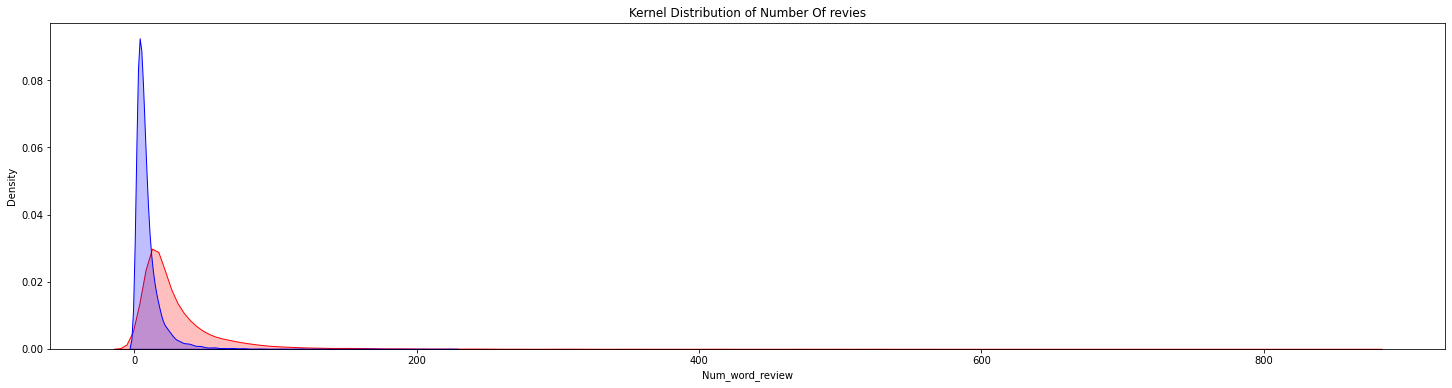

In [ ]:
plt.figure(figsize=(25,6))
p1=sns.kdeplot(bag_of_words['Num_word_review'], shade=True, color="r").set_title('Kernel Distribution of Number Of revies')
p1=sns.kdeplot(bag_of_words['Num_review_select'], shade=True, color="b")

Observation: review words are skewed to the right. 

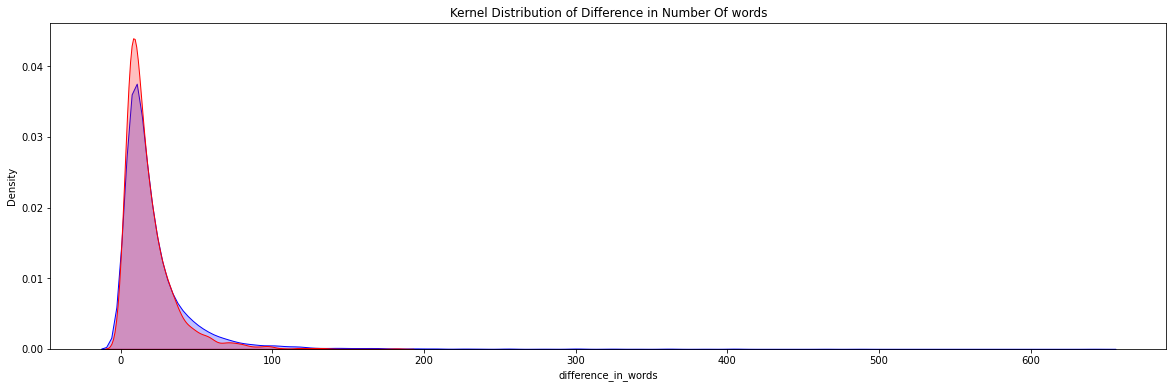

In [ ]:
plt.figure(figsize=(20,6))
p1=sns.kdeplot(bag_of_words[bag_of_words['sentiment']=='Positive']['difference_in_words'], shade=True, color="b").set_title('Kernel Distribution of Difference in Number Of words')
p2=sns.kdeplot(bag_of_words[bag_of_words['sentiment']=='Negative']['difference_in_words'], shade=True, color="r")

observation: No major difference between number of words in negative and positive sentiments as they are both skewed to the right. 
plot that there is peak for negative and positive plot around 30.

## Word Cloud

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [ ]:
from wordcloud import WordCloud
def word_the_cloud(sentiment,rating):
  if (sentiment=="all")&(rating=="all"):
    words =' '.join([text for text in bag_of_words['review_body']])
  elif (sentiment=="none"):
    words =' '.join([text for text in bag_of_words['review_body'][(bag_of_words['star_rating'] == rating)]])
  elif (rating=="none"):
    words =' '.join([text for text in bag_of_words['review_body'][(bag_of_words['sentiment'] == sentiment)]])
  else:
    words =' '.join([text for text in bag_of_words['review_body'][(bag_of_words['star_rating'] == rating)&(bag_of_words['sentiment'] == sentiment)]])


  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, max_words=25).generate(words)
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

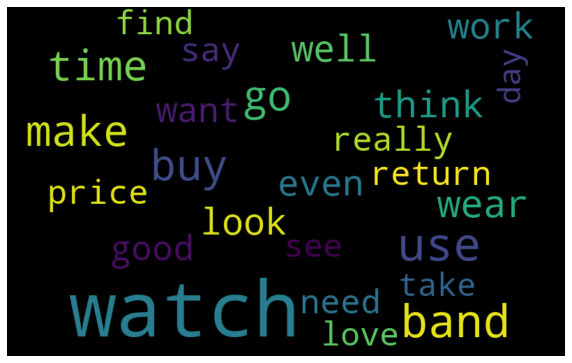

In [ ]:
word_the_cloud("all","all")

observation; watch is the most frequently talked about in all the feedbacks.
other most talked about words include time, and wrist.

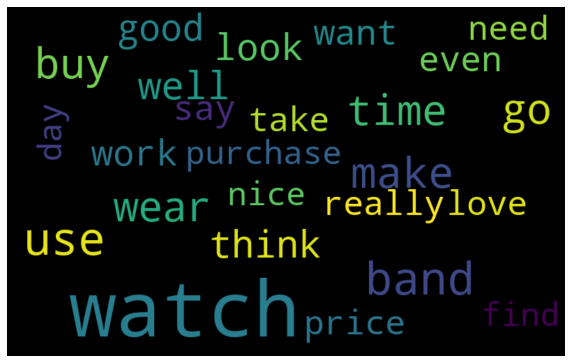

In [ ]:
word_the_cloud("Positive","none")

observation: Watch, love, great, and time were most frequent positive words. This means the online store sold more of the watches and that is why most words are centred around the watch.

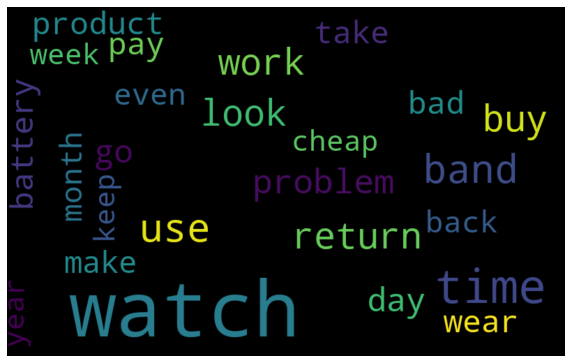

In [ ]:
word_the_cloud("Negative","none")

observation: watch, quality, problem,disappointed were the frequent negative words. these were mostly complain about the watch bought.

# Text Clustering

In [ ]:
bag_of_words = pd.read_csv('/content/bag_of_words.csv',index_col=0)

## KMeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(bag_of_words.review_body.values)
features = vec.transform(bag_of_words.review_body.values)

In [ ]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(features) 

In [ ]:
# for reproducibility
random_state = 0 
cls = MiniBatchKMeans(n_clusters=4, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=4, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [ ]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([3, 2, 2, ..., 2, 0, 2], dtype=int32)

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

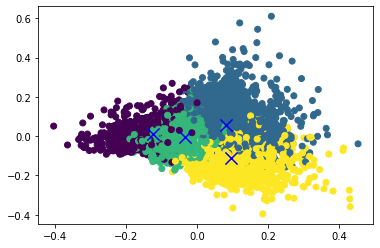

In [ ]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [ ]:
#Evalauation with labelled dataset
from sklearn.metrics import homogeneity_score
homogeneity_score(bag_of_words.star_rating, cls.predict(features))

0.03069731551001481

In [ ]:
#Evaluation with unlabelled dataset
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.003481584337364081

## Topic modelling

### NMF

In [ ]:
# number of topics to extract
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(bag_of_words.review_body)

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(features)

from sklearn.decomposition import NMF
cls = NMF(n_components=n_topics, random_state=random_state)
cls.fit(features)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 watch time day hand set use wear second read light date year month week hour 
1 battery work dead replace watch new buy stop arrive month send die receive week year 
2 look good nice like watch quality cheap price really picture feel big make expect buy 
3 love great watch gift buy price wear husband beautiful look compliment perfect color wife christmas 
4 band wrist small watch large fit big face size link leather break wear pin like 


### LDA

In [ ]:
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, stop_words="english", max_df=0.95, min_df=2)
features = vec.fit_transform(bag_of_words.review_body)

from sklearn.decomposition import LatentDirichletAllocation
cls = LatentDirichletAllocation(n_components=n_topics, random_state=random_state)
cls.fit(features)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
# list of unique words found by the vectorizer
feature_names = vec.get_feature_names()

# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

0 watch break work money broken stop waste band buy send return receive week fix time 
1 watch time work look good day like hand use set buy make light year great 
2 watch band look like wrist nice love small good great big wear face large size 
3 watch battery work love buy gift great look time price arrive product good dead receive 
4 belt instruction apart come poor kit cole kenneth useless defect fall manual grandson quality watch 


## Nearest Neighbors Search

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features=10_000)
features = vec.fit_transform(bag_of_words.review_body)

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(features)

print(features.shape) # (11314, 10000)

(11559, 10000)


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(features)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [ ]:
knn.kneighbors(features[0:1], return_distance=False)

array([[   0, 4009, 9107,  399, 8853, 3612, 9027, 5668, 1697, 9558]])

In [ ]:
knn.kneighbors(features[0:1], return_distance=True)

(array([[0.        , 0.72550183, 0.75573299, 0.76680854, 0.7707859 ,
         0.77622588, 0.77651951, 0.77841195, 0.78044061, 0.78554791]]),
 array([[   0, 4009, 9107,  399, 8853, 3612, 9027, 5668, 1697, 9558]]))

In [ ]:
input_texts = ["hello received item working battery dead disappointed purchased?", "watch was not worth this but good"]
input_features = vec.transform(input_texts)

D, N = knn.kneighbors(input_features, n_neighbors=2, return_distance=True)

for input_text, distances, neighbors in zip(input_texts, D, N):
    print("Input text = ", input_text[:200], "\n")
    for dist, neighbor_idx in zip(distances, neighbors):
        print("Distance = ", dist, "Neighbor idx = ", neighbor_idx)
        print(bag_of_words.review_body[neighbor_idx][:200])
        print("-"*200)
    print("="*200)
    print()

Input text =  hello received item working battery dead disappointed purchased? 

Distance =  0.3954594878043597 Neighbor idx =  752
hello receive item work the battery dead disappoint purchased
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Distance =  0.6708120404320197 Neighbor idx =  1128
first order watch come dead battery watch work replace get new watch dead battery return disappointed
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Input text =  watch was not worth this but good 

Distance =  0.5318850796524741 Neighbor idx =  2614
good quality cheap not worth price
----------------------------------------------------------------------------------------------------------------

## Naive Bayes

In [ ]:
# label encoding.

#label encoding 'tournament'
# label encoding.
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
bag_of_words['sentiment'] = label_encoder.fit_transform(bag_of_words['sentiment']) 
#
#preview
#
bag_of_words.head()
#
# Negative = 0
# Positive = 1

,star_rating,review_body,selected_text,sentiment
0,1,good luck find reasonably price band replaceme...,"['good luck', 'band order band dealer', 'wrong...",1
1,1,know mine mistake clearly state aqua confuse m...,"['mine mistake', 'much money']",0
2,1,rod hold bracelet break several time company f...,"['time company', 'sit drawer', 'fix time']",1
3,1,buy watch watch doesnot work watch run time sl...,"['doesnot work watch', 'beautiful doesnot show...",1
4,1,watch would fantastic hard set actually work p...,"['light turn', 'buy watch', 'little extra mone...",1


### N_grams

In [ ]:
 #N-Grams refer to a continuous sequence of n items from a given sample of text or speech.
# These items can be phonemes, syllables, letters, words or base pairs according to the application. 
# ---
# Ngrams with N=1 are called unigrams, Bigrams (N=2), Trigrams (N=3), etc.
# For instance, for a sentence "I love eating pasta", some word 2-grams would be (I love), 
# (love eating) and (eating pasta).
from nltk import word_tokenize, ngrams

# Word ngrams
# ---
#
list(ngrams(word_tokenize(bag_of_words['review_body'][0]), 1)) 

[('good',),
 ('luck',),
 ('find',),
 ('reasonably',),
 ('price',),
 ('band',),
 ('replacement',),
 ('order',),
 ('band',),
 ('dealer',),
 ('sell',),
 ('else',),
 ('town',),
 ('could',),
 ('get',),
 ('skagen',),
 ('send',),
 ('wrong',),
 ('guess',),
 ('try',),
 ('allow',),
 ('anyone',),
 ('else',),
 ('make',),
 ('band',),
 ('unique',),
 ('watch',),
 ('design',),
 ('seem',),
 ('stupid',),
 ('certainly',),
 ('never',),
 ('buy',)]

In [ ]:
# Bag of Words (BoW)
# --- 
# Bag of Words is one of the most commonly used feature extraction techniques with TF-IDF being the other. 
# This is a method of feature extraction with text data where it is a representation of text 
# that describes the occurrence of words within a document. By using this technique, we only 
# keep track of word counts and disregard the grammatical details and the word order. 
# ---
# You can consider using BoW in the following situations:
# 1. Building a baseline model which you will later optmize or decide to use other models.
# 2. If your dataset is small and context is domain specific.
# --- 
# 
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
X_train_counts = count.fit_transform(bag_of_words['review_body'])
#
# Show feature/indepedent variable matrix
X_train_counts.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

#transforming bag of words to Term Frequency Inverse Document Frequency(TF-IDF)
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#
#Normalizing the features.
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X_train_tfidf)

X_train_tfidf.shape

(11559, 17237)

In [ ]:
# Training the Model
# Now that we have performed feature extraction from our data, it is time to build our model. 
# We will start by splitting our data into training 80% and test sets
# 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, bag_of_words['sentiment'], test_size=0.2, random_state=69)

In [ ]:
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [ ]:
import numpy as np

# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.833044982698962


obervation: the model give 81.5% accuracy, we will now tune it.

In [ ]:
# Tuning the model/ gridsearch
#
from sklearn.model_selection import GridSearchCV
parameters = {
  'alpha': np.linspace(0.1,0.9, 6),
  'fit_prior': [True, False],
  
}
from sklearn.naive_bayes import MultinomialNB

grid_search = GridSearchCV(estimator=MultinomialNB(), 
                           param_grid=parameters,
                           cv=5)

grid_search.fit(X_train,y_train )

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.1 , 0.26, 0.42, 0.58, 0.74, 0.9 ]),
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.1 , 0.26, 0.42, 0.58, 0.74, 0.9 ]),
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid_search.best_params_


{'alpha': 0.42000000000000004, 'fit_prior': False}

In [ ]:
# Fitting our model 
# Then, all that we have to do is initialize the Naive Bayes Classifier and fit the data. 
# For text classification problems, the Multinomial Naive Bayes Classifier is well-suited
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=0.42000000000000004, fit_prior=False, class_prior=(1,1)).fit(X_train, y_train)

In [ ]:
 #Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8525086505190311


observation: we got an accuracy of ~85% after parameter tuning.

## Deep Learning

In [ ]:
import pandas as pd

In [ ]:
bag_of_words = pd.read_csv('/content/bag_of_words.csv',index_col=0)

In [ ]:
bag_of_words.head()

,star_rating,review_body,selected_text,sentiment
0,1,good luck find reasonably price band replaceme...,"['good luck', 'band order band dealer', 'wrong...",Positive
1,1,know mine mistake clearly state aqua confuse m...,"['mine mistake', 'much money']",Negative
2,1,rod hold bracelet break several time company f...,"['time company', 'sit drawer', 'fix time']",Positive
3,1,buy watch watch doesnot work watch run time sl...,"['doesnot work watch', 'beautiful doesnot show...",Positive
4,1,watch would fantastic hard set actually work p...,"['light turn', 'buy watch', 'little extra mone...",Positive


In [ ]:
new = bag_of_words[['review_body', 'sentiment']].copy()

In [ ]:
new.shape

(11559, 2)

In [ ]:
new.columns = ['text', 'label']
new.head()

,text,label
0,good luck find reasonably price band replaceme...,Positive
1,know mine mistake clearly state aqua confuse m...,Negative
2,rod hold bracelet break several time company f...,Positive
3,buy watch watch doesnot work watch run time sl...,Positive
4,watch would fantastic hard set actually work p...,Positive


In [ ]:
new.label.unique()

array(['Positive', 'Negative'], dtype=object)

In [ ]:
# Reclassify ratings to postive and negative
mapper = {"Negative":0, "Positive":1}
new.label.replace(mapper, inplace=True)
new.label.value_counts()

1    9583
0    1976
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new, new.label, test_size = 0.20, stratify = new.label )
X_train.shape, X_test.shape

((9247, 2), (2312, 2))

In [ ]:
X_train.label.value_counts()

1    7666
0    1581
Name: label, dtype: int64

In [ ]:
X_test.label.value_counts()

1    1917
0     395
Name: label, dtype: int64

In [ ]:
X_test.label = 0
X_test.sample(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,text,label
2219,item small doea tiger logos show picture needl...,0
2094,buy watch pink watch wife battery die sent wat...,0
4536,buy warehouse deal classify “ use like new ” b...,0
11527,beautiful watch small delecate expect gift sel...,0
5868,initially like everything watch even fact look...,0
7971,comfortable watch synthetic band good closing ...,0
2440,pro nice size visibility display good light ac...,0
4278,receive watch love look watch work assume batt...,0
3693,buy watch christmas present boyfriend year lov...,0
2420,arrive home find watch dead battery watch buy ...,0


In [ ]:
X_test.label.unique()

array([0])

needs to be set zero as per simple transformer specifications

In [ ]:
#installing the required packages
!pip install transformers
!pip install tensorboardx
!pip install simpletransformers 

In [ ]:
#imprting required libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from scipy.special import softmax
from simpletransformers.classification import ClassificationModel

In [ ]:
# %%time
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=2021)

predictions = []
error = []
for train_index, test_index in folds.split(X_train, X_train.label):
   val_train, val_test = X_train.iloc[train_index], X_train.iloc[test_index]

model = ClassificationModel('roberta', 'roberta-base', use_cuda=True, num_labels = 2,  
                            args={'train_batch_size': 32,
                                  'reprocess_input_data': True,
                                  'overwrite_output_dir': True,
                                  'fp16': 32,
                                  'do_lower_case': False,
                                  'num_train_epochs': 20,
                                  'max_seq_length': 100,
                                  'regression': False,
                                  'manual_seed': 2021,
                                  'learning_rate': 4e-5,
                                  'weight_decay': 0,
                                  'save_eval_checkpoints': False,
                                  'save_model_every_epoch': False,
                                  'silent': False})

model.train_model(X_train)
raw_outputs_val = model.eval_model(X_test)[1]
raw_outputs_val = softmax(raw_outputs_val, axis = 1)
raw_outputs_val = pd.DataFrame(raw_outputs_val).idxmax(axis = 1)
err = accuracy_score(y_test, raw_outputs_val)
error.append(err)
print(err)

test_predictions = model.eval_model(X_test)[1]
test_predictions = softmax(test_predictions, axis = 1)
predictions.append(test_predictions)

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Running Epoch 0 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 1 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 2 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 3 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 4 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 5 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 6 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 7 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 8 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 9 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 10 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 11 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 12 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 13 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 14 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 15 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 16 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 17 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 18 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

Running Epoch 19 of 20:   0%|          | 0/289 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/289 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


0.9416089965397924


Running Evaluation:   0%|          | 0/289 [00:00<?, ?it/s]

observation: this model gave an accuracy of 94%. this is pretty good.this mean we perfomed will in NLP.